In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from matplotlib.transforms import Bbox
import cartopy.feature as cfeature

xr.set_options(keep_attrs=True)

In [2]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

def find_dpi(w, h, d):
    """
    w : width in pixels
    h : height in pixels
    d : diagonal in inches
    """
    w_inches = (d ** 2 / (1 + h ** 2 / w ** 2)) ** 0.5
    return round(w / w_inches)

def inches_to_points(inches):
    return 72. * inches

def points_to_inches(points):
    return points / 72

In [3]:
dpi = find_dpi(1792, 1120, 16)

In [141]:
fig, ax = plt.subplots(figsize=(8, 2), dpi=dpi)

lw=50

ax.hlines(y=0, lw=lw, xmin=x.min(), xmax=x.max(), color='#9CDEF6')
ax.hlines(y=0, lw=lw, xmin=.8, xmax=1 ,color='#FCA481')

cutoff = .8

xs = [0, cutoff, 1]
ax.set_xticks(xs)
ax.set_xticklabels([fmt(i*100) for i in xs])

ax.set_yticklabels([])
ax.spines[:].set_visible(False)

buf = 0.1
ax.text(x=buf, y=0, s='Train', color='black', fontsize='x-large', va='center', ha='center')
ax.text(x=cutoff+buf, y=0, s='Test', color='black', fontsize='x-large', va='center', ha='center')


ax.tick_params(which='both', width=0)
ax.grid(alpha=0.5, axis='x')

fig.savefig('/Users/kyle/GoogleDrive/College/Graduate/Thesis/Presentation Graphics/train-test-split.png', 
            format='png', bbox_inches='tight')

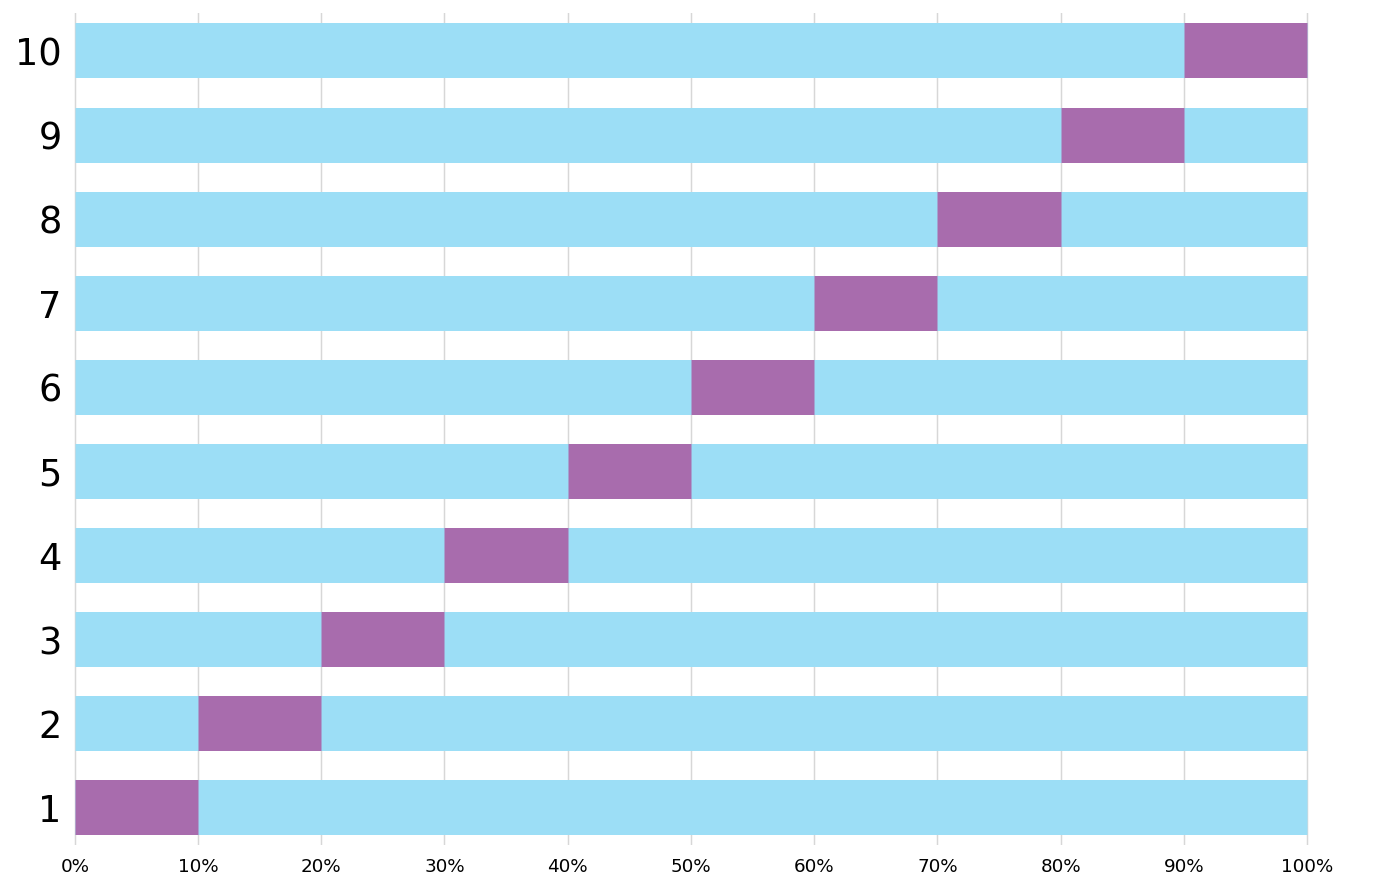

In [111]:
fig, ax = plt.subplots(figsize=set_size(inches_to_points(13.3)), dpi=dpi)

def fmt(x):
    return f"{x:.0f}%"

lw=30
folds = 10
x = np.arange(0, 1.01, 1/folds)

for y in range(1,folds + 1):
    ax.hlines(y=y, lw=lw, xmin=x.min(), xmax=x.max(), color='#9CDEF6')
    ax.hlines(y=y, 
        xmin=(y-1) / folds,
        xmax=( y ) / folds,
        color='#A86CAD', lw=lw
    )

ax.set_xticks(x)
ax.set_yticks(range(1,folds+1))
ax.set_xticklabels([fmt(i*100) for i in x])
ax.spines[:].set_visible(False)
ax.tick_params(which='both', width=0)
ax.grid(alpha=0.5, axis='x')
ax.tick_params(axis='y', labelsize=20, pad=-30, )

fig.savefig('/Users/kyle/GoogleDrive/College/Graduate/Thesis/Presentation Graphics/cross-validation.png', format='png')

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj_def = {'long_name': 'GOES-R ABI fixed grid projection','grid_mapping_name': 'geostationary','perspective_point_height': 35786023.0,'semi_major_axis': 6378137.0,'semi_minor_axis': 6356752.31414,'inverse_flattening': 298.2572221,'latitude_of_projection_origin': 0.0,'longitude_of_projection_origin': -75.0,'sweep_angle_axis': 'x'}

globe = ccrs.Globe(
    inverse_flattening = proj_def['inverse_flattening'],
    semimajor_axis = proj_def['semi_major_axis'],
    semiminor_axis = proj_def['semi_minor_axis']
)

plate = ccrs.PlateCarree()
proj = ccrs.Geostationary(
    central_longitude=proj_def['longitude_of_projection_origin'], 
    satellite_height=proj_def['perspective_point_height'], 
    false_easting=0, 
    false_northing=0, 
    globe=globe,
    sweep_axis=proj_def['sweep_angle_axis']
)

In [103]:
fig, ax = plt.subplots(dpi=300, subplot_kw=dict(projection=proj))

# fname = 'data/Natural_Earth_quick_start/50m_raster/NE1_50M_SR_W/NE1_50M_SR_W.tif'
# img = plt.imread(fname)
# ax.imshow(img, origin='upper', extent=[-180, 180, -90, 90], transform=ccrs.PlateCarree())

ax.add_wms(wms='https://neo.gsfc.nasa.gov/wms/wms?version=1.3.0&service=WMS',
               layers=['BlueMarbleNG'])

ax.add_feature(cfeature.STATES, lw=0.25)
ax.spines[:].set_visible(False)

# save_path = '/Users/kyle/GoogleDrive/College/Graduate/Thesis/Figures and Data/tuned_models'
# fig.savefig(f'{save_path}/GOES-Zenith-Angle.png', format='png')

In [97]:
fig, ax = plt.subplots(dpi=300)


ax.spines[:].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

N = 1000

x = np.random.uniform(-1, 1, size=N)
y = np.random.uniform(-1, 1, size=N)

ax.scatter(x, y, s=(np.random.rand(N) * 20).astype(int), 
           alpha=0.5, edgecolor='#CEC7A1', facecolor='#f2f0e6')

# ax.set_facecolor("#E6F2F0aa")


fig.savefig('/Users/kyle/GoogleDrive/College/Graduate/Thesis/Presentation Graphics/aerosols.png', 
            format='png', transparent=True, bbox_inches='tight')



In [9]:
equal_area = ccrs.AlbersEqualArea(central_latitude=39.8283, central_longitude=-98.5795)

In [10]:
proj_def = {'long_name': 'GOES-R ABI fixed grid projection','grid_mapping_name': 'geostationary','perspective_point_height': 35786023.0,'semi_major_axis': 6378137.0,'semi_minor_axis': 6356752.31414,'inverse_flattening': 298.2572221,'latitude_of_projection_origin': 0.0,'longitude_of_projection_origin': -75.0,'sweep_angle_axis': 'x'}

globe = ccrs.Globe(
    inverse_flattening = proj_def['inverse_flattening'],
    semimajor_axis = proj_def['semi_major_axis'],
    semiminor_axis = proj_def['semi_minor_axis']
)

plate = ccrs.PlateCarree()
proj = ccrs.Geostationary(
    central_longitude=proj_def['longitude_of_projection_origin'], 
    satellite_height=proj_def['perspective_point_height'], 
    false_easting=0, 
    false_northing=0, 
    globe=globe,
    sweep_axis=proj_def['sweep_angle_axis']
)

In [235]:
ds = xr.open_mfdataset('/Volumes/Shores/GOES/AODC/2021/078/16/*.nc', combine='nested', concat_dim="t")

In [236]:
ds = ds.assign(x=ds.x * proj_def['perspective_point_height'], y = ds.y * proj_def['perspective_point_height'])

In [13]:
extents = {
    'US': {
        'minlat': 25,
        'maxlat': 49,
        'minlon': -120,
        'maxlon': -73
    },
    'Houston': {
        'minlat': 29.3,
        'maxlat': 30.08910587,
        'minlon': -95.81349756,
        'maxlon': -94.73398897
    },
    'LA' : {
        'minlat': 33.5,
        'maxlat': 34.2152144,
        'minlon': -117.8,
        'maxlon': -116.7522488
    },
    'Pittsburgh': {
        'minlat': 40.14211,
        'maxlat': 40.62940,
        'minlon': -80.29827,
        'maxlon': -79.46404
    },
    'Nebraska': {
        'minlat': 40.000102,
        'maxlat': 43.00037,
        'minlon': -104.053729,
        'maxlon': -95.317255
    },
    'Fargo': {
        'minlat': 46.35421,
        'maxlat': 47.34895,
        'minlon': -97.33842,
        'maxlon': -95.75006
    }
}

def set_extent(ax, extents):
    minlon, maxlon = extents['minlon'], extents['maxlon']
    minlat, maxlat = extents['minlat'], extents['maxlat']
    ax.set_extent([minlon, maxlon, minlat, maxlat], ccrs.PlateCarree())

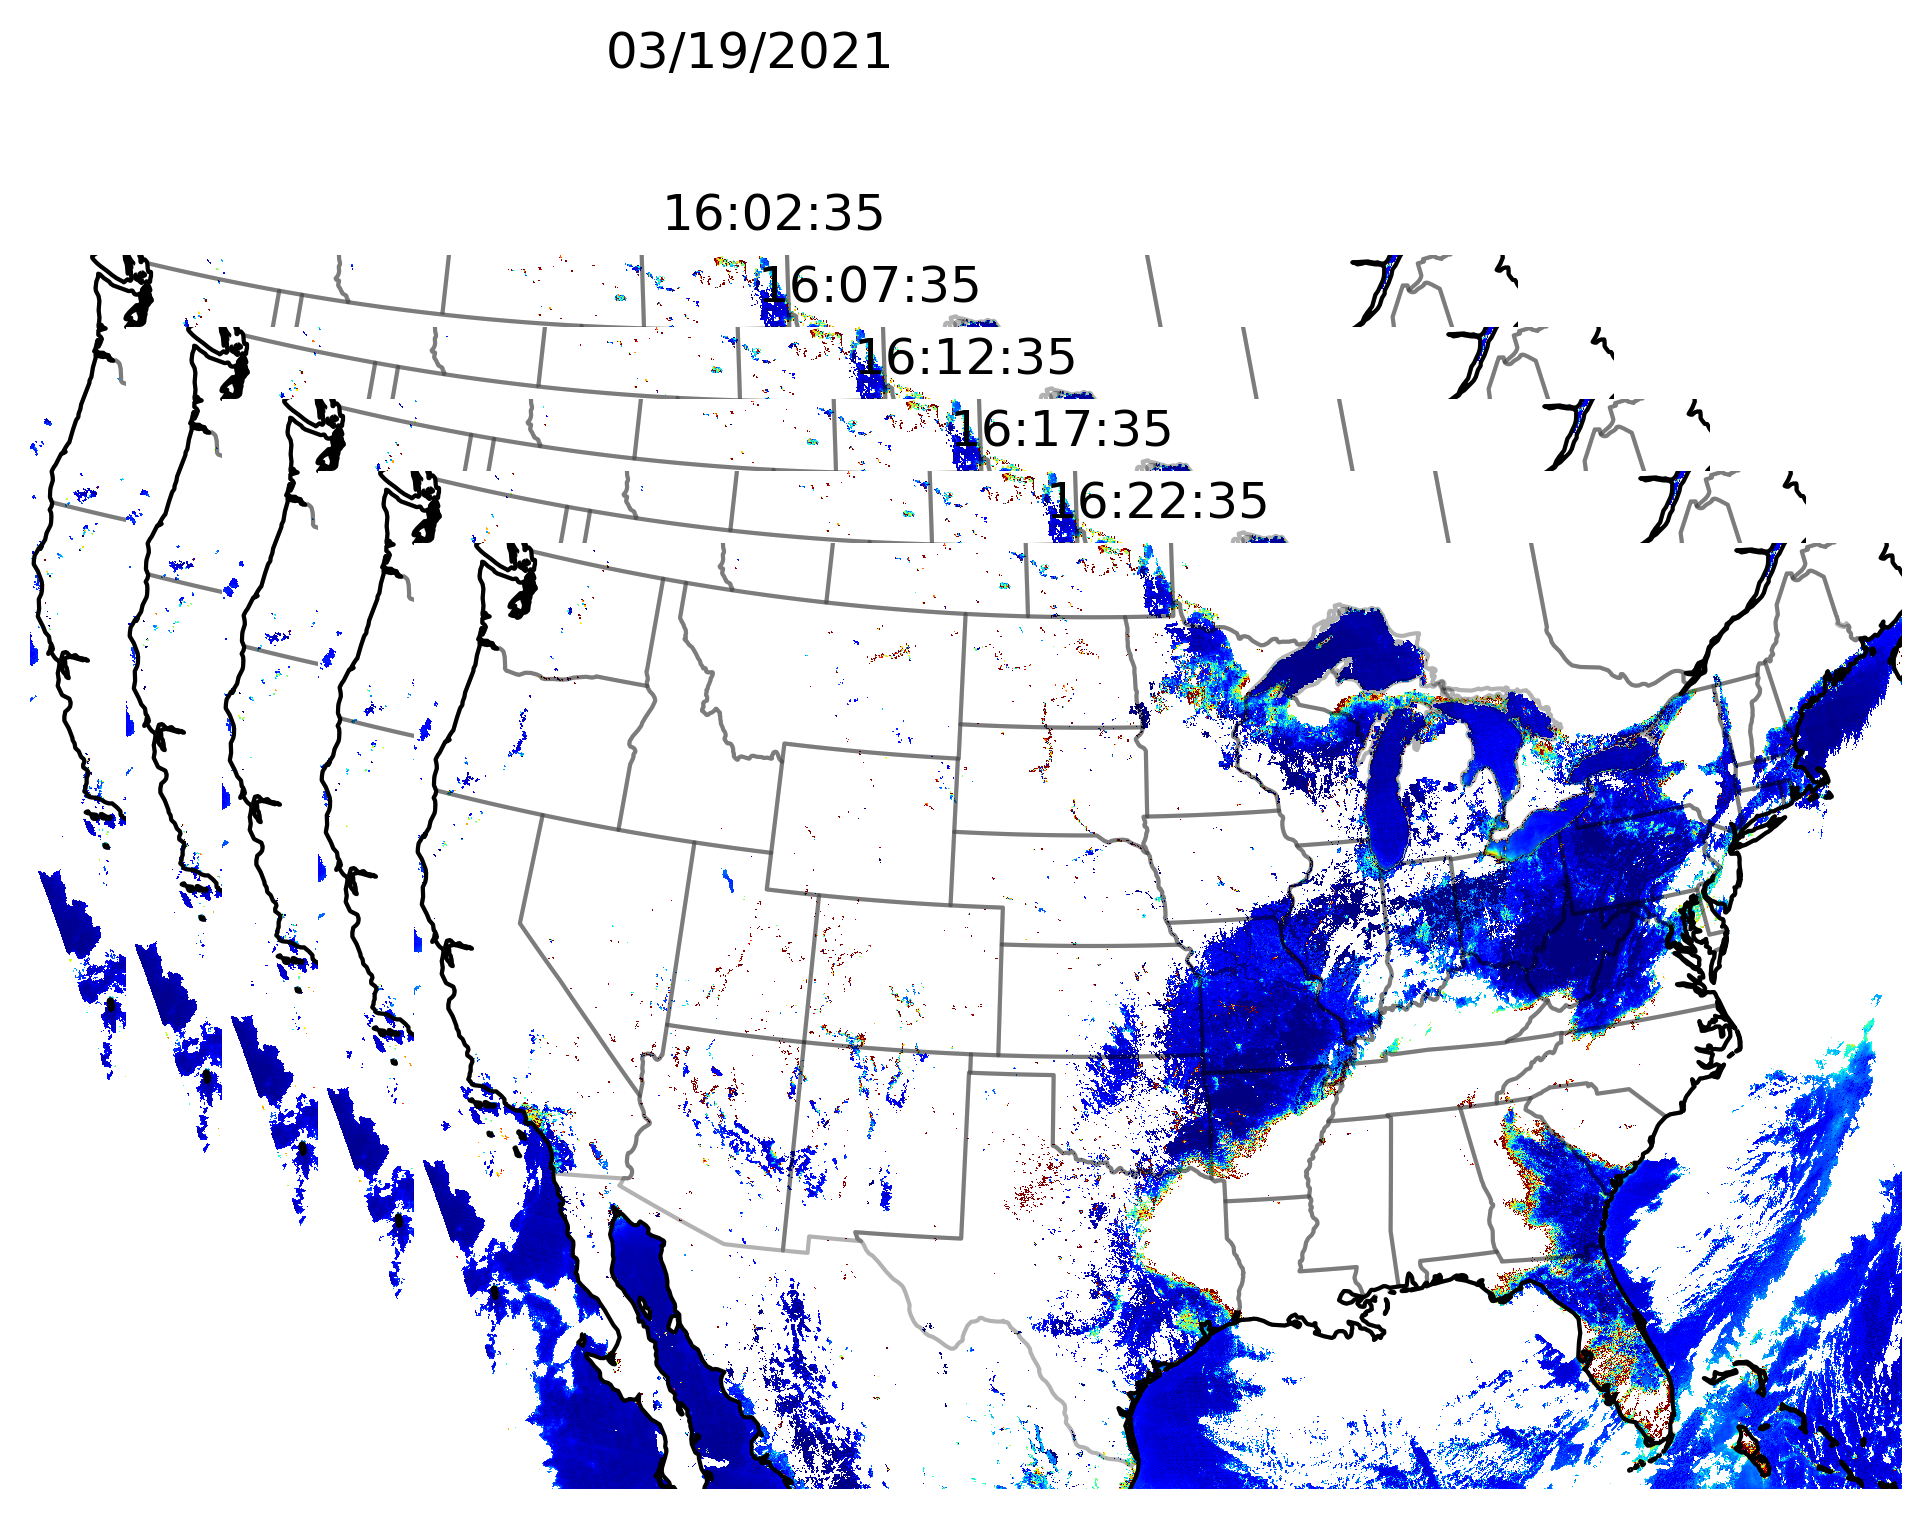

In [251]:
n = 5
fig, ax = plt.subplots(dpi=300, subplot_kw=dict(projection=equal_area))

suptitle = pd.to_datetime(ds.t[0].item()).strftime('%m/%d/%Y')
fig.suptitle(suptitle)

axes = [ax]
for idx, i in enumerate(np.linspace(0, .2, n)):
    title = pd.to_datetime(ds.t[idx].item()).strftime('%H:%M:%S')
    if i == 0:
        ds.isel(t=idx)['AOD'].plot(ax=ax, cmap='jet', transform=proj, add_colorbar=False, vmin=0, vmax=1)
        ax.set_title(title)
        continue
                                   
    an_ax = ax.figure.add_axes(Bbox(ax.get_position().get_points()+[i, -i]), projection=equal_area)
    axes.append(an_ax)

    ds.isel(t=idx)['AOD'].plot(ax=an_ax, cmap='jet', transform=proj, add_colorbar=False, vmin=0, vmax=1)
    an_ax.set_title(title)

for idx, ax in enumerate(axes):
#     ax.patch.set_alpha(idx / 10)
    ax.coastlines()
    ax.add_feature(cfeature.STATES, alpha=0.3)
    set_extent(ax, extents['US'])
    ax.spines[:].set_visible(False)
    ax.grid(True, alpha=0.2)
    ax.tick_params(which='both', width=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
#     ax.text(x=0, y=0, s=f'{idx} {ax.patch.get_alpha()}', transform=ax.transAxes)
    
fig.savefig('/Users/kyle/GoogleDrive/College/Graduate/Thesis/Presentation Graphics/aod-averaging-example.png', 
            format='png', transparent=True, bbox_inches='tight')

In [238]:
hour = ds.where(ds.DQF < 2).resample(t='1h').mean()

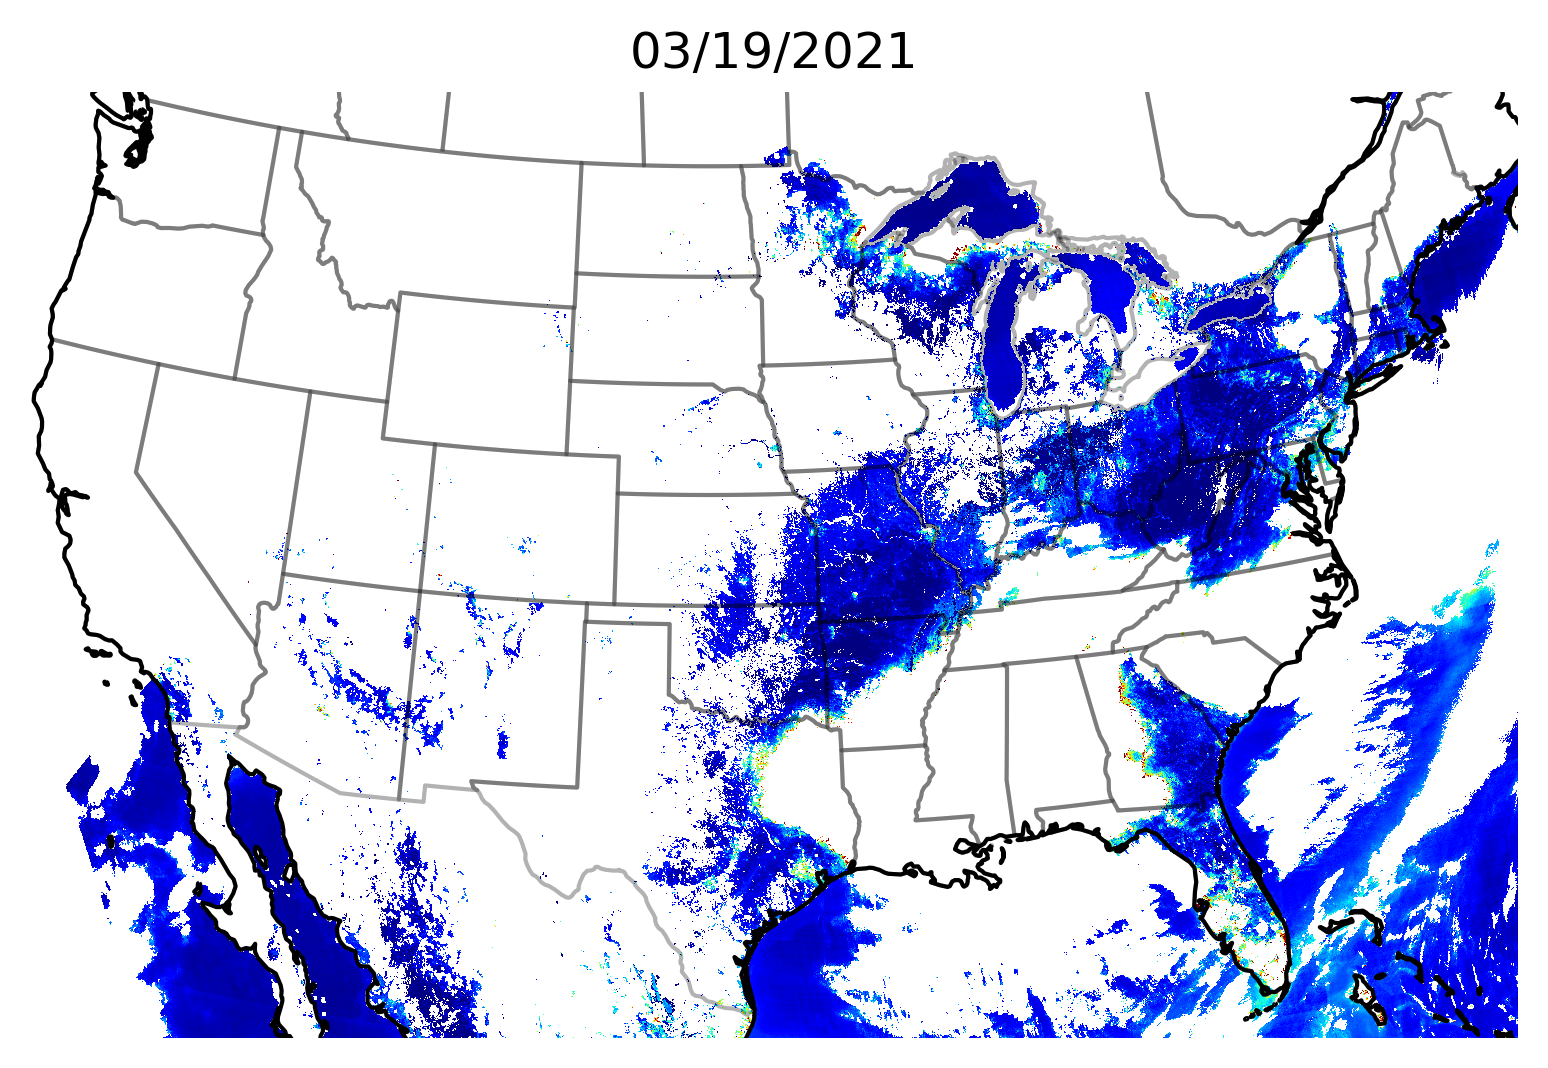

In [250]:
fig, ax = plt.subplots(dpi=300, subplot_kw=dict(projection=equal_area))

hour.isel(t=0)['AOD'].plot(ax=ax, cmap='jet', transform=proj, add_colorbar=False, vmin=0, vmax=1)
title = pd.to_datetime(hour.t[0].item()).strftime('%m/%d/%Y')
ax.set_title(title)
                                   
ax.coastlines()
ax.add_feature(cfeature.STATES, alpha=0.3)
set_extent(ax, extents['US'])
ax.spines[:].set_visible(False)
ax.grid(True, alpha=0.2)
ax.tick_params(which='both', width=0)
ax.set_xticklabels([])
ax.set_yticklabels([])
    
fig.savefig('/Users/kyle/GoogleDrive/College/Graduate/Thesis/Presentation Graphics/aod-hourly-average-example.png', 
            format='png', transparent=True, bbox_inches='tight')

In [15]:
with xr.open_dataset('/Volumes/Shores/GOES/AODC/averages/2021/daily/200.nc') as ds2:
    ds2.load()

In [16]:
ds2 = ds2.assign(x=ds2.x * proj_def['perspective_point_height'], y = ds2.y * proj_def['perspective_point_height'])

In [27]:
import geopandas as gpd

def colorize_state(geometry):
        facecolor = (0.9375, 0.9375, 0.859375)
        return {'facecolor': '#00000000', 'edgecolor': '#00000033'}

regions = gpd.read_file('data/ne_50m_admin_1_states_provinces.zip')
states = regions[regions.admin == 'United States of America']
contiguous_us = states[(states.name != 'Alaska') & (states.name != 'Hawaii')]

In [29]:
fig, ax = plt.subplots(dpi=300, subplot_kw=dict(projection=equal_area))

m = ds2.isel(t=0)['AOD'].plot(ax=ax, transform=proj, cmap = 'jet', add_colorbar=False, vmin=0, vmax=1)
title = pd.to_datetime(ds2.t[0].item()).strftime('%m/%d/%Y')
ax.set_title(title)

cbar = fig.colorbar(m, aspect=60, shrink=0.7)
cbar.outline.set_linewidth(0)
cbar.ax.tick_params(which='both', width=0)
                                   
ax.add_geometries(
    contiguous_us.geometry,
    ccrs.PlateCarree(),
    styler=colorize_state, lw=0.5)

set_extent(ax, extents['US'])
ax.spines[:].set_visible(False)
ax.grid(True, alpha=0.2)
ax.tick_params(which='both', width=0)
ax.set_xticklabels([])
ax.set_yticklabels([])
    
fig.savefig('/Users/kyle/GoogleDrive/College/Graduate/Thesis/Presentation Graphics/aod-daily-average-example.png', 
            format='png', transparent=True, bbox_inches='tight')

In [291]:
with xr.open_dataset('/Volumes/Shores/ERA5/era5_pblh_2021.nc') as pbl:
    pbl.load()
    
with xr.open_dataset('/Volumes/Shores/ERA5/era5_land/era5_land_202104.nc') as met:
    met.load()

In [292]:
met['sp'] = met['sp'] / 100

In [294]:
met['sp'].attrs['units'] = 'hPa'

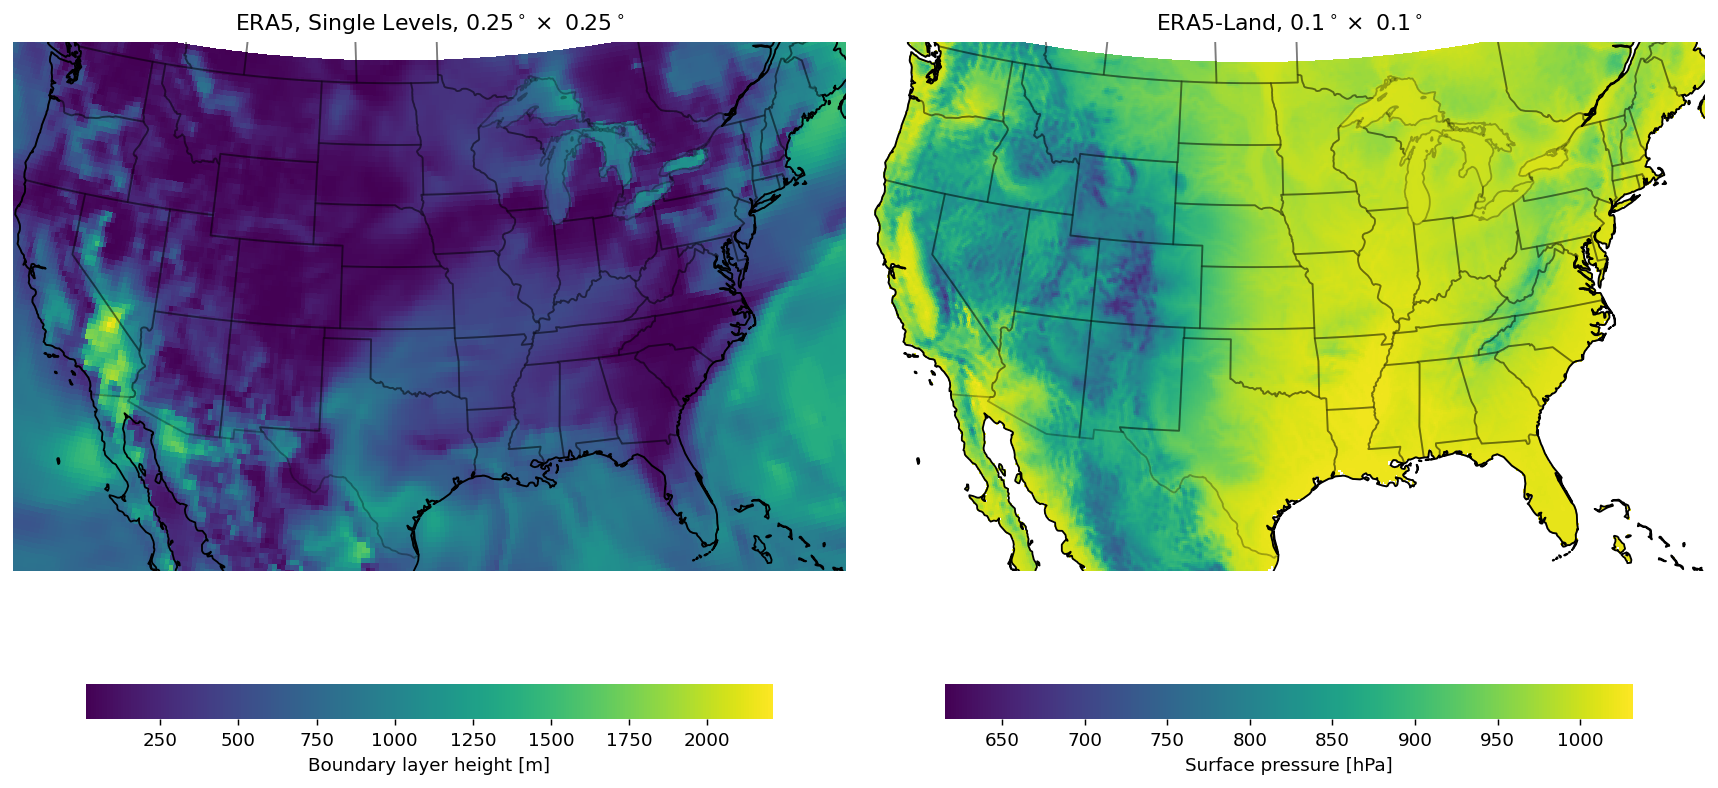

In [295]:
fig, (ax1, ax2) = plt.subplots(1, 2, 
                               figsize=set_size(inches_to_points(13.3), subplots=(1, 2)), 
                               dpi=dpi, 
                               subplot_kw=dict(projection=equal_area))

cbar = dict(orientation='horizontal', shrink=0.6)

pbl['blh'].isel(time=0).plot(ax=ax1, transform=plate, cbar_kwargs=cbar)
met['sp'].isel(time=0).plot(ax=ax2, transform=plate, cbar_kwargs=cbar)

ax1.set_title(r'ERA5, Single Levels, $0.25^\circ\times~0.25^\circ$')
ax2.set_title(r'ERA5-Land, $0.1^\circ\times~0.1^\circ$')

for ax in (ax1, ax2):
    ax.coastlines()
    ax.add_feature(cfeature.STATES, alpha=0.3)
    set_extent(ax, extents['US'])
    ax.spines[:].set_visible(False)
    ax.grid(True, alpha=0.2)
    ax.tick_params(which='both', width=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

fig.get_axes()[2].spines[:].set_visible(False)
fig.get_axes()[3].spines[:].set_visible(False)

fig.tight_layout(pad=-7)

fig.savefig('/Users/kyle/GoogleDrive/College/Graduate/Thesis/Presentation Graphics/meteorology.png', format='png')

In [1]:
from model_collection import ModelCollection

mc = ModelCollection.__new__(ModelCollection)
mc.load('data/model_runs/tuned-trained-all_years_months.pcl')

In [3]:
from sklearn.tree import plot_tree

In [26]:
columns = ['longitude',
 'latitude',
 'AOD',
 'u10',
 'v10',
 'd2m',
 't2m',
 'lai_hv',
 'lai_lv',
 'sp',
 'skt',
 'tp',
 'blh',
 'Jan.',
 'Feb.',
 'Mar.',
 'Apr.',
 'May',
 'June',
 'July',
 'Aug.',
 'Sept.',
 'Oct.',
 'Nov.',
 'Dec.']

In [31]:
tree = mc.models['Extra Trees'].named_steps['extra_trees'].estimators_[2]

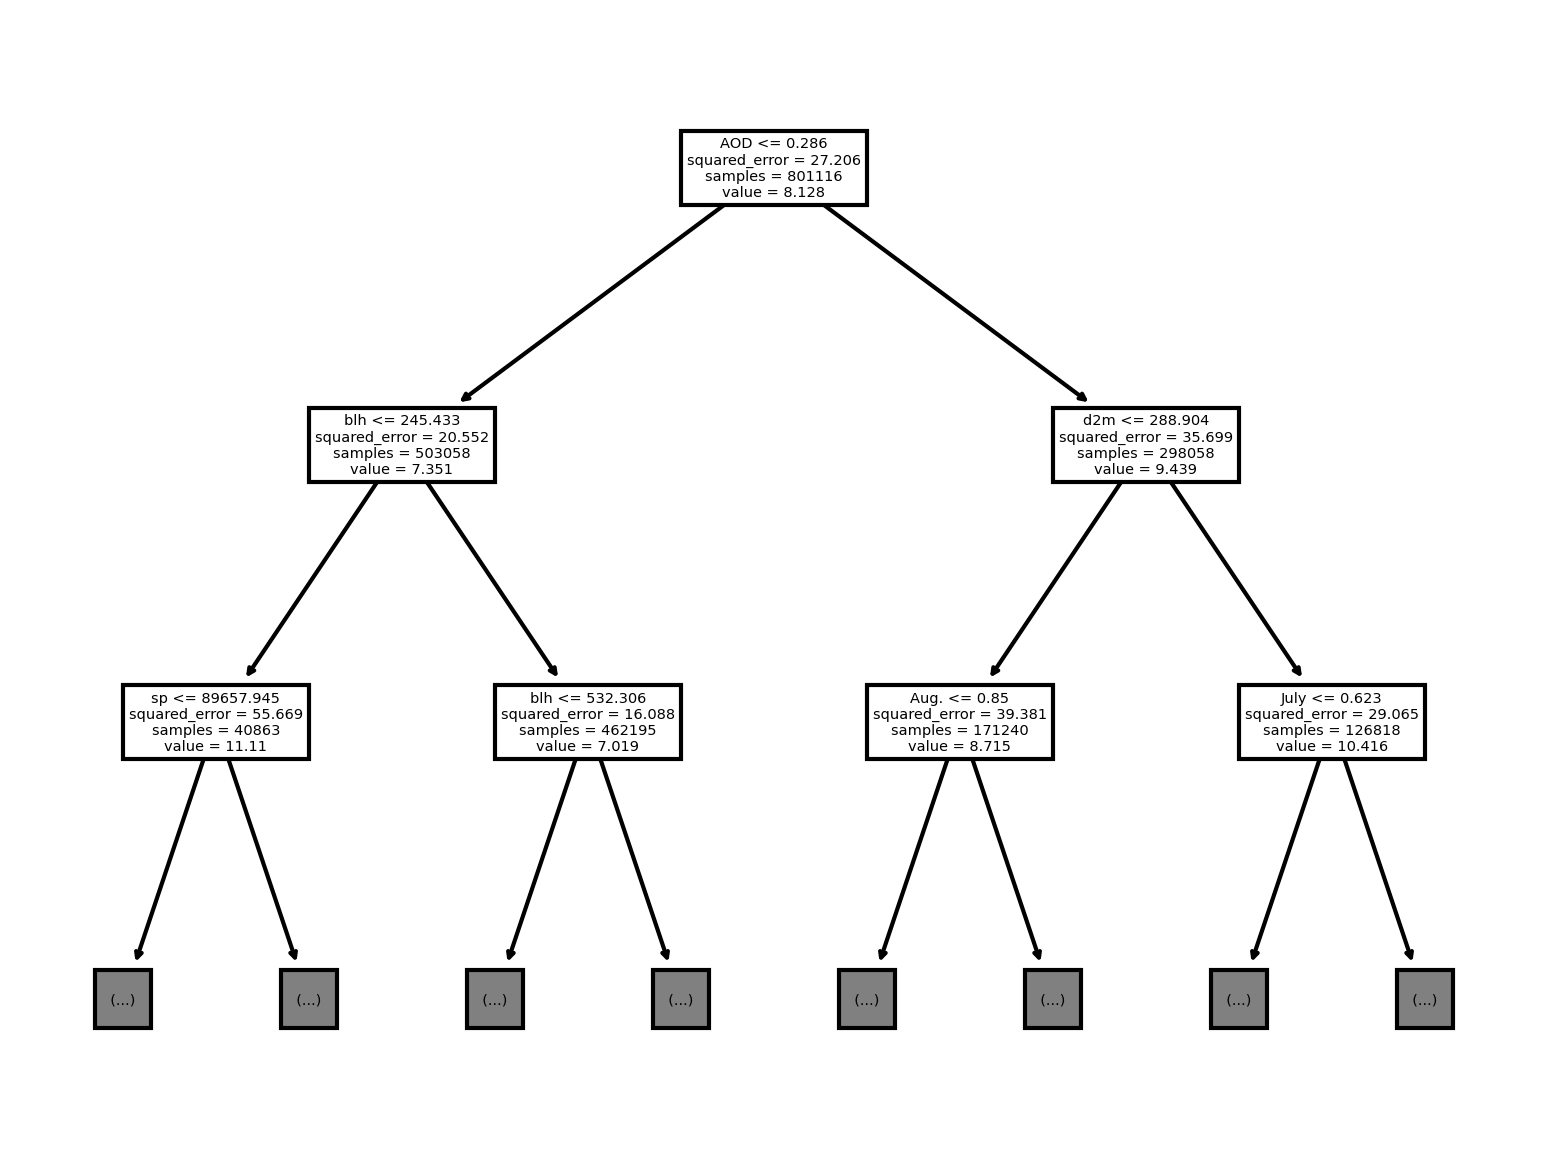

In [32]:
fig, ax = plt.subplots(dpi=300)

plot_tree(tree, max_depth=2, ax=ax, feature_names=columns);

In [37]:
# https://gist.github.com/craffel/2d727968c3aaebd10359

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

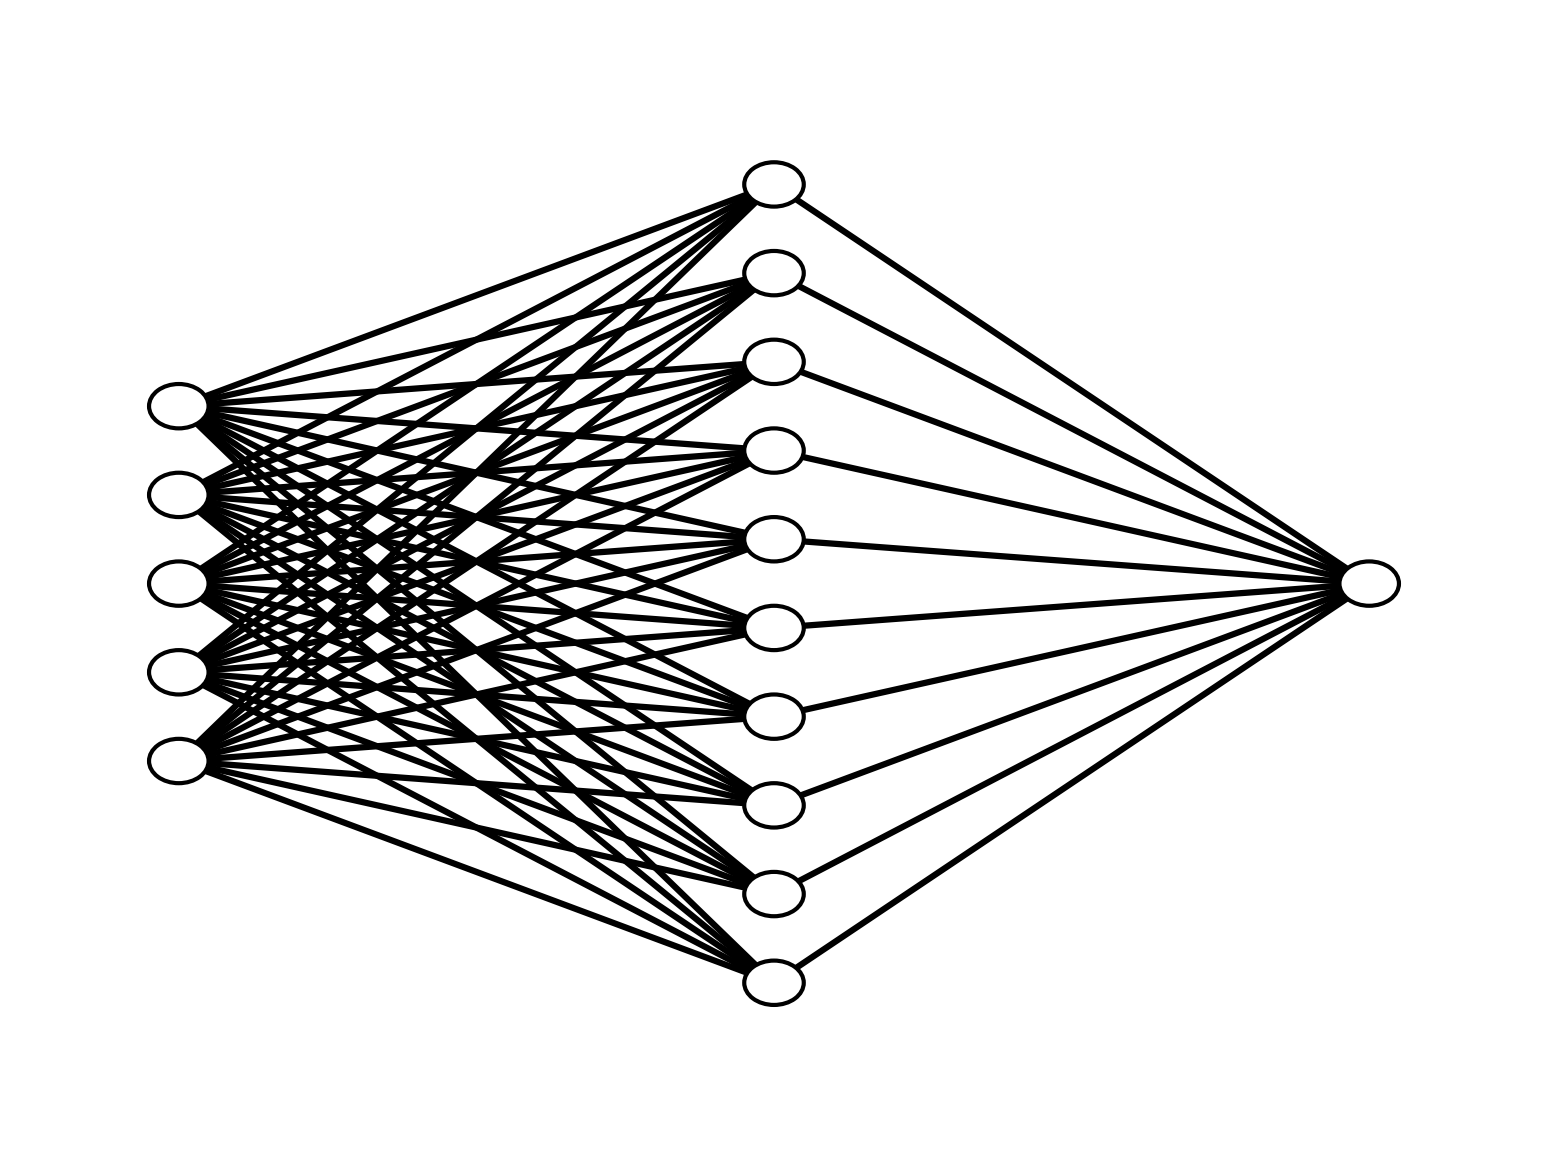

In [45]:
fig, ax = plt.subplots(dpi=300)

draw_neural_net(ax, .1, .9, .1, .9, [5, 10, 1])

ax.spines[:].set_visible(False)
ax.tick_params(axis='both', width=0)
ax.set_xticklabels([])
ax.set_yticklabels([]);